In [1]:
library(tidyverse)
library(ggplot2)
library(pheatmap)
library(pheatmap)
library(DESeq2)
library(reshape2)
library(biomaRt)
library(VennDiagram)
library(eulerr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.10     ✔ readr     2.1.5 
✔ forcats   1.0.0      ✔ stringr   1.5.1 
✔ ggplot2   3.5.0      ✔ tibble    3.2.1 
✔ lubridate 1.9.3      ✔ tidyr     1.2.1 
✔ purrr     1.0.1      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘pack

In [4]:
krab_zfps <- read.delim(file = 'KRAB_ZFP_list.csv', sep = ",", header = T)
krab_zfps
#
keep <- c(1,10:12,17:20)
fc_115 <- read.delim(file = 'e11.clean.rc.csv', sep = ",", header = T)
fc_115 <- fc_115[,keep]
cols <- c("Geneid", "E115_FCT1", "E115_FCT2", "E115_FCT3", "E115_MCT1", "E115_MCT2", "E115_MCT3", "E115_MCT4")
colnames(fc_115) <- cols
head(fc_115)
#
keep <- c(1,7:10,15:18)
fc_125 <- read.delim(file = 'e12.clean.rc.csv', sep = ",", header = T)
fc_125 <- fc_125[,keep]
cols <- c("Geneid", "E125_FCT1", "E125_FCT2", "E125_FCT3", "E125_FCT4", "E125_MCT1", "E125_MCT2", "E125_MCT3", "E125_MCT4")
colnames(fc_125) <- cols
head(fc_125)
#
keep <- c(1,10:12,17:19)
fc_135 <- read.delim(file = 'e13.clean.rc.csv', sep = ",", header = T)
fc_135 <- fc_135[,keep]
cols <- c("Geneid", "E135_FCT1", "E135_FCT2", "E135_FCT3", "E135_MCT1", "E135_MCT2", "E135_MCT3")
colnames(fc_135) <- cols
head(fc_135)

Label,Gene.ID,domain.configuration
<chr>,<chr>,<chr>
Zfp597,ENSMUSG00000039789,KRAB-ZNFs
Zfp94,ENSMUSG00000074282,KRAB-ZNFs
Zfp184,ENSMUSG00000006720,KRAB-ZNFs
Zfp30,ENSMUSG00000047473,KRAB-ZNFs
Gm26920,ENSMUSG00000058447,KRAB-ZNFs
Zfp69,ENSMUSG00000064141,KRAB-ZNFs
Zfp46,ENSMUSG00000051351,KRAB-ZNFs
Zfp213,ENSMUSG00000071256,SCAN-KRAB-ZNFs
Zfp2,ENSMUSG00000049321,KRAB-ZNFs


,Geneid,E115_FCT1,E115_FCT2,E115_FCT3,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,4863,5692,9615,8098,6916,6044,11664
2,ENSMUSG00000026312,0,0,2,0,0,0,16
3,ENSMUSG00000039748,5536,6093,7546,5806,7062,5615,6769
4,ENSMUSG00000104158,0,0,0,0,0,0,0
5,ENSMUSG00000057363,1030,2050,2379,3851,2732,1880,2298
6,ENSMUSG00000047216,34,2,12,6,18,2,2


,Geneid,E125_FCT1,E125_FCT2,E125_FCT3,E125_FCT4,E125_MCT1,E125_MCT2,E125_MCT3,E125_MCT4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,7013,9048,7762,9010,9686,10075,11433,12997
2,ENSMUSG00000026312,20,0,13,10,2,6,0,16
3,ENSMUSG00000039748,5014,4177,5373,6828,10710,9538,13843,12899
4,ENSMUSG00000104158,0,0,0,5,16,20,6,8
5,ENSMUSG00000057363,3548,2657,3254,3194,4546,4263,4076,4757
6,ENSMUSG00000047216,4,2,4,6,18,6,2,8


,Geneid,E135_FCT1,E135_FCT2,E135_FCT3,E135_MCT1,E135_MCT2,E135_MCT3
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,7353,4982,4885,4078,6418,2935
2,ENSMUSG00000026312,4,2,40,20,82,6
3,ENSMUSG00000039748,16914,9950,14100,4814,7607,5862
4,ENSMUSG00000104158,8,8,32,0,10,0
5,ENSMUSG00000057363,4593,3757,4009,1472,2643,1829
6,ENSMUSG00000047216,4,4,4,0,8,2


In [5]:
join <- full_join(fc_115, fc_125, by = c("Geneid"))
join <- full_join(join, fc_135, by = c("Geneid"))
join <- join %>% mutate_all(~replace(., is.na(.), 0))
join

Geneid,E115_FCT1,E115_FCT2,E115_FCT3,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E125_FCT1,E125_FCT2,⋯,E125_MCT1,E125_MCT2,E125_MCT3,E125_MCT4,E135_FCT1,E135_FCT2,E135_FCT3,E135_MCT1,E135_MCT2,E135_MCT3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000051285,4863,5692,9615,8098,6916,6044,11664,7013,9048,⋯,9686,10075,11433,12997,7353,4982,4885,4078,6418,2935
ENSMUSG00000026312,0,0,2,0,0,0,16,20,0,⋯,2,6,0,16,4,2,40,20,82,6
ENSMUSG00000039748,5536,6093,7546,5806,7062,5615,6769,5014,4177,⋯,10710,9538,13843,12899,16914,9950,14100,4814,7607,5862
ENSMUSG00000104158,0,0,0,0,0,0,0,0,0,⋯,16,20,6,8,8,8,32,0,10,0
ENSMUSG00000057363,1030,2050,2379,3851,2732,1880,2298,3548,2657,⋯,4546,4263,4076,4757,4593,3757,4009,1472,2643,1829
ENSMUSG00000047216,34,2,12,6,18,2,2,4,2,⋯,18,6,2,8,4,4,4,0,8,2
ENSMUSG00000038702,130,274,166,20,708,6,184,270,274,⋯,194,252,212,192,759,772,1414,134,176,196
ENSMUSG00000033021,656,504,776,522,976,242,898,450,734,⋯,1280,886,1718,1541,2174,2248,3038,942,1292,1134
ENSMUSG00000055214,50,18,16,46,20,2,15,14,14,⋯,43,54,24,25,68,20,34,16,13,10


In [6]:
keep <- c(1,5:8,13:16,20:22)
males <- join[,keep]

In [7]:
keep <- c(1,2:4,9:12,17:19)
females <- join[,keep]

In [8]:
males <- column_to_rownames(males, "Geneid")
females <- column_to_rownames(females, "Geneid")
males <- as.matrix(males)
males
females <- as.matrix(females)
females

,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E125_MCT1,E125_MCT2,E125_MCT3,E125_MCT4,E135_MCT1,E135_MCT2,E135_MCT3
ENSMUSG00000051285,8098,6916,6044,11664,9686,10075,11433,12997,4078,6418,2935
ENSMUSG00000026312,0,0,0,16,2,6,0,16,20,82,6
ENSMUSG00000039748,5806,7062,5615,6769,10710,9538,13843,12899,4814,7607,5862
ENSMUSG00000104158,0,0,0,0,16,20,6,8,0,10,0
ENSMUSG00000057363,3851,2732,1880,2298,4546,4263,4076,4757,1472,2643,1829
ENSMUSG00000047216,6,18,2,2,18,6,2,8,0,8,2
ENSMUSG00000038702,20,708,6,184,194,252,212,192,134,176,196
ENSMUSG00000033021,522,976,242,898,1280,886,1718,1541,942,1292,1134
ENSMUSG00000055214,46,20,2,15,43,54,24,25,16,13,10
ENSMUSG00000033007,0,2,60,6,32,10,13,2,0,2,0


,E115_FCT1,E115_FCT2,E115_FCT3,E125_FCT1,E125_FCT2,E125_FCT3,E125_FCT4,E135_FCT1,E135_FCT2,E135_FCT3
ENSMUSG00000051285,4863,5692,9615,7013,9048,7762,9010,7353,4982,4885
ENSMUSG00000026312,0,0,2,20,0,13,10,4,2,40
ENSMUSG00000039748,5536,6093,7546,5014,4177,5373,6828,16914,9950,14100
ENSMUSG00000104158,0,0,0,0,0,0,5,8,8,32
ENSMUSG00000057363,1030,2050,2379,3548,2657,3254,3194,4593,3757,4009
ENSMUSG00000047216,34,2,12,4,2,4,6,4,4,4
ENSMUSG00000038702,130,274,166,270,274,230,224,759,772,1414
ENSMUSG00000033021,656,504,776,450,734,584,654,2174,2248,3038
ENSMUSG00000055214,50,18,16,14,14,39,72,68,20,34
ENSMUSG00000033007,40,2,8,42,0,11,0,0,4,6


In [9]:
Con_Females <- factor(c(rep("E115",3), rep("E125",4), rep("E135", 3)))
Con_Males <- factor(c(rep("E115",4), rep("E125",4), rep("E135", 3)))

In [10]:
M_coldata <- data.frame(row.names=colnames(males), Con_Males)
F_coldata <- data.frame(row.names=colnames(females), Con_Females)
M_coldata
F_coldata

,Con_Males
,<fct>
E115_MCT1,E115
E115_MCT2,E115
E115_MCT3,E115
E115_MCT4,E115
E125_MCT1,E125
E125_MCT2,E125
E125_MCT3,E125
E125_MCT4,E125
E135_MCT1,E135


,Con_Females
,<fct>
E115_FCT1,E115
E115_FCT2,E115
E115_FCT3,E115
E125_FCT1,E125
E125_FCT2,E125
E125_FCT3,E125
E125_FCT4,E125
E135_FCT1,E135
E135_FCT2,E135


In [11]:
dds_males <- DESeqDataSetFromMatrix(countData=males, colData=M_coldata, design=~Con_Males)
ddsrun_males <- DESeq(dds_males)
#
dds_females <- DESeqDataSetFromMatrix(countData=females, colData=F_coldata, design=~Con_Females)
ddsrun_females <- DESeq(dds_females)

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [12]:
rld_Males <- rlogTransformation(ddsrun_males)
rld_Females <- rlogTransformation(ddsrun_females)

In [14]:
##
Male_DE_115135 <- results(ddsrun_males, contrast = c('Con_Males', 'E135', 'E115'))
Male_DE_115135 <- Male_DE_115135[order(Male_DE_115135$padj), ]
#
Female_DE_115_135 <- results(ddsrun_females, contrast = c("Con_Females", "E135", "E115"))
Female_DE_115_135 <- Female_DE_115_135[order(Female_DE_115_135$padj), ]

In [15]:
M_DE_Table <- merge(as.data.frame(Male_DE_115135), as.data.frame(assay(rld_Males)), by="row.names", sort=FALSE)
names(M_DE_Table)[1] <- "Gene"
(M_DE_Table)
#
F_DE_Table <- merge(as.data.frame(Female_DE_115_135), as.data.frame(assay(rld_Females)), by="row.names", sort=FALSE)
names(F_DE_Table)[1] <- "Gene"
(F_DE_Table)



###Tables with normalized counts. Not used for visualizations below. Commented to maintain record, not used in this analysis. 
#M_DE_Table <- merge(as.data.frame(Male_DE_115135), as.data.frame(counts(ddsrun_males, normalized=TRUE)), by="row.names", sort=FALSE)
#names(M_DE_Table)[1] <- "Gene"
#(M_DE_Table)
#
#F_DE_Table <- merge(as.data.frame(Female_DE_115_135), as.data.frame(counts(ddsrun_females, normalized=TRUE)), by="row.names", sort=FALSE)
#names(F_DE_Table)[1] <- "Gene"
#(F_DE_Table)

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E125_MCT1,E125_MCT2,E125_MCT3,E125_MCT4,E135_MCT1,E135_MCT2,E135_MCT3
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000019889,4144.2963,-3.692663,0.1252998,-29.47061,6.854144e-191,1.073565e-186,12.555407,12.768138,12.758781,12.497641,11.455521,11.371250,11.381778,11.465915,9.991646,9.950710,9.878581
ENSMUSG00000005360,3200.4288,-6.305853,0.3001656,-21.00792,5.551910e-98,4.347978e-94,11.824571,12.369785,12.602930,11.981295,10.626892,11.040444,10.729106,10.921415,8.078069,7.748723,7.728367
ENSMUSG00000033569,2393.1234,-4.757408,0.2362385,-20.13815,3.418429e-90,1.784762e-86,11.897217,11.888044,11.828306,11.622990,10.932383,10.296514,10.566704,10.713884,8.414793,8.265995,8.588419
ENSMUSG00000041836,8686.7780,-4.537242,0.2411951,-18.81150,6.079276e-79,2.380493e-75,13.689498,13.635862,13.639070,13.289744,12.979646,12.550417,12.610413,13.054563,10.359631,10.084244,10.460512
ENSMUSG00000026893,3565.6115,-2.951363,0.1571737,-18.77771,1.149312e-78,3.600335e-75,12.407941,12.233848,12.270737,12.169736,11.674894,11.390229,11.660464,11.789660,10.067332,10.205908,10.068860
ENSMUSG00000017631,2738.5198,-2.335882,0.1251867,-18.65919,1.063285e-77,2.775706e-74,11.923527,11.941068,12.116256,11.889511,11.083208,11.065780,11.085037,10.875200,10.273284,10.280171,10.168637
ENSMUSG00000025716,7540.9246,-4.504458,0.2512256,-17.92993,6.886306e-72,1.540860e-68,12.794059,13.092091,13.060692,13.410658,13.014116,13.104000,12.963255,12.895373,10.027628,10.101141,9.596276
ENSMUSG00000021758,10353.0417,2.380549,0.1328833,17.91459,9.073833e-72,1.776543e-68,12.003410,12.230239,12.193140,12.273299,13.262920,13.234615,13.205670,13.330201,14.068105,13.804589,14.014519
ENSMUSG00000010660,6796.5956,-4.339646,0.2439415,-17.78970,8.493341e-71,1.478124e-67,13.268405,13.007348,13.596078,12.798280,12.604917,12.307660,12.492315,12.597795,10.124614,10.104323,10.020151


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_FCT1,E115_FCT2,E115_FCT3,E125_FCT1,E125_FCT2,E125_FCT3,E125_FCT4,E135_FCT1,E135_FCT2,E135_FCT3
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000052372,53713.5262,10.244149,0.6788498,15.090450,1.871613e-51,2.957897e-47,8.268434,7.950086,8.628242,7.562115,7.303655,7.708051,7.858558,14.242795,18.509919,17.303224
ENSMUSG00000044636,1834.6995,2.310030,0.1876452,12.310630,7.940072e-35,6.274245e-31,9.750375,9.703696,9.785426,10.787356,10.462362,10.763950,10.642406,11.255499,11.413000,11.468719
ENSMUSG00000042616,1099.4113,-2.737250,0.2289796,-11.954121,6.178374e-33,3.254767e-29,10.633137,10.890264,10.549929,9.959866,9.839273,9.730244,9.782468,8.736979,8.977461,8.644068
ENSMUSG00000079264,4262.0470,-3.181595,0.2697379,-11.795133,4.135455e-32,1.633918e-28,12.626051,12.346042,12.778102,11.689069,12.178591,11.855068,11.931866,10.547987,10.270182,10.193902
ENSMUSG00000062773,1104.1692,9.228199,0.7880666,11.709922,1.133833e-31,3.583821e-28,5.050765,4.981414,5.472546,8.212146,7.605474,7.480849,7.787537,9.084756,10.899860,11.447086
ENSMUSG00000063849,902.5132,3.018490,0.2599540,11.611629,3.596975e-31,9.474432e-28,8.064023,7.891305,8.216082,10.139102,9.891933,10.071975,9.783640,9.977821,10.263678,9.931549
ENSMUSG00000022892,2316.5089,-2.889603,0.2537323,-11.388391,4.777298e-30,1.078577e-26,11.964916,12.091788,12.000844,10.009404,9.887639,9.698276,10.192877,9.659675,9.948546,10.055053
ENSMUSG00000058932,205.0250,-4.367048,0.3866142,-11.295623,1.379230e-29,2.724670e-26,8.053371,7.704943,8.263198,7.489477,7.560127,7.201454,7.841093,5.666810,5.693725,5.657799
ENSMUSG00000010592,15818.4327,4.031254,0.3590638,11.227127,3.000783e-29,5.269375e-26,11.365997,11.755416,11.674154,14.394765,13.454315,13.590074,13.769639,14.566099,14.319535,14.394248


In [16]:
male_zfp <- M_DE_Table %>% 
    filter(Gene %in% krab_zfps$Gene.ID) %>%
    filter(abs(log2FoldChange) > 2 & padj < 0.05)
male_zfp
#
female_zfp <- F_DE_Table %>% 
    filter(Gene %in% krab_zfps$Gene.ID) %>% 
    filter(Gene %in% krab_zfps$Gene.ID) %>%
    filter(abs(log2FoldChange) > 2 & padj < 0.05)
female_zfp

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E125_MCT1,E125_MCT2,E125_MCT3,E125_MCT4,E135_MCT1,E135_MCT2,E135_MCT3
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000047371,186.427793,5.143718,0.3892358,13.214914,7.196886e-40,2.398400e-37,5.177919,5.131515,5.040875,5.369512,6.716665,6.692095,7.220217,7.171726,8.099361,8.034506,8.373441
ENSMUSG00000060397,115.305473,5.879444,0.5926230,9.921052,3.371824e-23,3.143624e-21,4.626788,4.597323,4.431190,4.553621,6.873113,6.049838,6.962812,6.573247,7.143517,7.382314,6.972740
ENSMUSG00000072915,260.225846,5.271509,0.7358630,7.163710,7.852237e-13,2.127847e-11,4.671687,5.028097,5.933551,4.770011,8.122843,8.093609,7.951730,8.171433,8.245150,8.453402,8.031948
ENSMUSG00000078580,73.979717,5.847284,0.8293421,7.050510,1.782636e-12,4.607496e-11,4.331471,4.163803,4.190361,4.505995,6.641533,5.633679,6.065113,5.800189,6.426102,6.160599,6.541594
ENSMUSG00000095990,276.853139,-2.277490,0.3366992,-6.764168,1.340774e-11,3.004369e-10,7.830093,8.507355,8.852530,8.622120,7.749868,7.971536,7.938283,7.966239,7.107888,6.983369,7.016101
ENSMUSG00000055560,694.959331,-2.976952,0.4716986,-6.311130,2.770047e-10,5.098385e-09,9.823567,9.539861,8.745530,10.250690,9.192634,9.693395,9.455811,9.584518,7.784052,7.913162,7.143188
ENSMUSG00000030486,52.359722,4.083592,0.6676241,6.116603,9.559119e-10,1.611674e-08,4.744852,4.468098,4.288892,4.344361,5.745471,5.400675,5.287006,5.657599,6.350761,5.762687,5.710321
ENSMUSG00000090963,68.564101,2.546917,0.4227073,6.025251,1.688479e-09,2.709697e-08,5.356255,5.286236,5.197856,5.117085,6.154792,5.949878,5.777791,6.287992,6.524631,6.078729,6.554230
ENSMUSG00000066007,470.032624,-2.543098,0.4607162,-5.519878,3.392343e-08,4.366004e-07,8.514611,9.277080,8.470766,9.699621,9.087498,8.997096,8.496716,9.144907,7.571621,7.465219,7.119836


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_FCT1,E115_FCT2,E115_FCT3,E125_FCT1,E125_FCT2,E125_FCT3,E125_FCT4,E135_FCT1,E135_FCT2,E135_FCT3
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000057396,219.820721,2.582081,0.3022963,8.541557,1.324255e-17,3.875653e-15,6.636675,6.633729,6.484639,7.665296,8.068190,7.679234,7.779600,7.969163,8.057290,8.226633
ENSMUSG00000056019,170.068368,4.499489,0.5481261,8.208858,2.233028e-16,5.041539e-14,5.550499,5.316424,5.533442,7.583987,6.460317,7.225254,7.309015,7.577672,7.730982,7.960681
ENSMUSG00000051977,577.959004,7.413596,0.9798726,7.565877,3.852574e-14,5.485233e-12,5.368547,4.751957,5.452193,8.375804,7.746183,6.996649,6.603070,7.612791,9.792617,10.541559
ENSMUSG00000051499,70.970433,6.257535,0.8953733,6.988744,2.773585e-12,2.247884e-10,4.268589,4.234244,4.233101,5.612358,5.225002,4.930669,4.789809,6.030780,6.301467,7.042317
ENSMUSG00000022987,69.811892,9.874484,1.5129352,6.526707,6.723145e-11,3.810957e-09,3.571240,3.550640,3.549955,4.605568,3.776644,4.697600,4.027774,5.746187,6.041616,6.966496
ENSMUSG00000030486,91.199014,6.226893,0.9906858,6.285437,3.269329e-10,1.524144e-08,4.407918,4.289151,4.144235,5.456992,4.410200,5.860250,5.041192,6.189266,7.016742,7.340108
ENSMUSG00000095909,166.158347,-3.280862,0.5489730,-5.976364,2.281735e-09,8.524949e-08,7.694656,7.214456,8.219207,6.920800,7.285714,7.081934,7.312231,6.222882,5.540419,5.982545
ENSMUSG00000074194,825.857095,2.850199,0.4837438,5.891959,3.816440e-09,1.305941e-07,8.531333,8.778408,7.657168,8.122561,7.429352,7.473774,7.599785,10.447917,10.796801,10.204396
ENSMUSG00000063047,718.001928,-2.084952,0.3628370,-5.746248,9.124526e-09,2.800078e-07,9.803131,10.371362,9.957495,8.739441,8.938929,9.421420,9.277312,8.722102,8.748168,8.348870


In [17]:
#use biomaRt to convert the Ensembl IDs that featurecounts used to Gene names. The alignment was done using mm10, so we will use db version 102, which is the mm10 annotation.
ensembl <- useEnsembl(biomart = 'genes', dataset = 'mmusculus_gene_ensembl', version = 109)
ensembl
#
annotLookup <- getBM(mart = ensembl, attributes = c('ensembl_gene_id','gene_biotype','external_gene_name'), uniqueRows = TRUE)
df <- c(1,3)
annotLookup_gene <- annotLookup[,df]
annotLookup_gene

Object of class 'Mart':
  Using the ENSEMBL_MART_ENSEMBL BioMart database
  Using the mmusculus_gene_ensembl dataset

ensembl_gene_id,external_gene_name
<chr>,<chr>
ENSMUSG00000064336,mt-Tf
ENSMUSG00000064337,mt-Rnr1
ENSMUSG00000064338,mt-Tv
ENSMUSG00000064339,mt-Rnr2
ENSMUSG00000064340,mt-Tl1
ENSMUSG00000064341,mt-Nd1
ENSMUSG00000064342,mt-Ti
ENSMUSG00000064343,mt-Tq
ENSMUSG00000064344,mt-Tm


In [18]:
zfp_male_merge <- inner_join(male_zfp, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
cols <- c(1,19,2:18)
zfp_male_merge <- zfp_male_merge[,cols]
zfp_male_merge
#
zfp_female_merge <- inner_join(female_zfp, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
cols <- c(1,18,2:17)
zfp_female_merge <- zfp_female_merge[,cols]
zfp_female_merge

Gene,external_gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E125_MCT1,E125_MCT2,E125_MCT3,E125_MCT4,E135_MCT1,E135_MCT2,E135_MCT3
<I<chr>>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000047371,Zfp768,186.427793,5.143718,0.3892358,13.214914,7.196886e-40,2.398400e-37,5.177919,5.131515,5.040875,5.369512,6.716665,6.692095,7.220217,7.171726,8.099361,8.034506,8.373441
ENSMUSG00000060397,Zfp128,115.305473,5.879444,0.5926230,9.921052,3.371824e-23,3.143624e-21,4.626788,4.597323,4.431190,4.553621,6.873113,6.049838,6.962812,6.573247,7.143517,7.382314,6.972740
ENSMUSG00000072915,Gm12258,260.225846,5.271509,0.7358630,7.163710,7.852237e-13,2.127847e-11,4.671687,5.028097,5.933551,4.770011,8.122843,8.093609,7.951730,8.171433,8.245150,8.453402,8.031948
ENSMUSG00000078580,E430018J23Rik,73.979717,5.847284,0.8293421,7.050510,1.782636e-12,4.607496e-11,4.331471,4.163803,4.190361,4.505995,6.641533,5.633679,6.065113,5.800189,6.426102,6.160599,6.541594
ENSMUSG00000095990,Zfp97,276.853139,-2.277490,0.3366992,-6.764168,1.340774e-11,3.004369e-10,7.830093,8.507355,8.852530,8.622120,7.749868,7.971536,7.938283,7.966239,7.107888,6.983369,7.016101
ENSMUSG00000055560,Zfp459,694.959331,-2.976952,0.4716986,-6.311130,2.770047e-10,5.098385e-09,9.823567,9.539861,8.745530,10.250690,9.192634,9.693395,9.455811,9.584518,7.784052,7.913162,7.143188
ENSMUSG00000030486,Zfp108,52.359722,4.083592,0.6676241,6.116603,9.559119e-10,1.611674e-08,4.744852,4.468098,4.288892,4.344361,5.745471,5.400675,5.287006,5.657599,6.350761,5.762687,5.710321
ENSMUSG00000090963,Gm17655,68.564101,2.546917,0.4227073,6.025251,1.688479e-09,2.709697e-08,5.356255,5.286236,5.197856,5.117085,6.154792,5.949878,5.777791,6.287992,6.524631,6.078729,6.554230
ENSMUSG00000066007,Zfp600,470.032624,-2.543098,0.4607162,-5.519878,3.392343e-08,4.366004e-07,8.514611,9.277080,8.470766,9.699621,9.087498,8.997096,8.496716,9.144907,7.571621,7.465219,7.119836


Gene,external_gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_FCT1,E115_FCT2,E115_FCT3,E125_FCT1,E125_FCT2,E125_FCT3,E125_FCT4,E135_FCT1,E135_FCT2,E135_FCT3
<I<chr>>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000057396,Zfp759,219.820721,2.582081,0.3022963,8.541557,1.324255e-17,3.875653e-15,6.636675,6.633729,6.484639,7.665296,8.068190,7.679234,7.779600,7.969163,8.057290,8.226633
ENSMUSG00000056019,Zfp709,170.068368,4.499489,0.5481261,8.208858,2.233028e-16,5.041539e-14,5.550499,5.316424,5.533442,7.583987,6.460317,7.225254,7.309015,7.577672,7.730982,7.960681
ENSMUSG00000051977,Prdm9,577.959004,7.413596,0.9798726,7.565877,3.852574e-14,5.485233e-12,5.368547,4.751957,5.452193,8.375804,7.746183,6.996649,6.603070,7.612791,9.792617,10.541559
ENSMUSG00000051499,Zfp786,70.970433,6.257535,0.8953733,6.988744,2.773585e-12,2.247884e-10,4.268589,4.234244,4.233101,5.612358,5.225002,4.930669,4.789809,6.030780,6.301467,7.042317
ENSMUSG00000022987,Zfp641,69.811892,9.874484,1.5129352,6.526707,6.723145e-11,3.810957e-09,3.571240,3.550640,3.549955,4.605568,3.776644,4.697600,4.027774,5.746187,6.041616,6.966496
ENSMUSG00000030486,Zfp108,91.199014,6.226893,0.9906858,6.285437,3.269329e-10,1.524144e-08,4.407918,4.289151,4.144235,5.456992,4.410200,5.860250,5.041192,6.189266,7.016742,7.340108
ENSMUSG00000095909,Zfp997,166.158347,-3.280862,0.5489730,-5.976364,2.281735e-09,8.524949e-08,7.694656,7.214456,8.219207,6.920800,7.285714,7.081934,7.312231,6.222882,5.540419,5.982545
ENSMUSG00000074194,Zfp791,825.857095,2.850199,0.4837438,5.891959,3.816440e-09,1.305941e-07,8.531333,8.778408,7.657168,8.122561,7.429352,7.473774,7.599785,10.447917,10.796801,10.204396
ENSMUSG00000063047,Zfp780b,718.001928,-2.084952,0.3628370,-5.746248,9.124526e-09,2.800078e-07,9.803131,10.371362,9.957495,8.739441,8.938929,9.421420,9.277312,8.722102,8.748168,8.348870


In [91]:
table(zfp_male_merge$Gene %in% zfp_female_merge$Gene)


FALSE  TRUE 
   21    19 

In [23]:
males <- zfp_male_merge
colnames(males)
#
keep <- c(2,9:12,17:19)
males <- males[,keep]
males <- column_to_rownames(males, "external_gene_name")
#continue with prep for heatmap
males <- as.matrix(males)
colnames(males)

[1] "Gene"               "external_gene_name" "baseMean"          
 [4] "log2FoldChange"     "lfcSE"              "stat"              
 [7] "pvalue"             "padj"               "E115_MCT1"         
[10] "E115_MCT2"          "E115_MCT3"          "E115_MCT4"         
[13] "E125_MCT1"          "E125_MCT2"          "E125_MCT3"         
[16] "E125_MCT4"          "E135_MCT1"          "E135_MCT2"         
[19] "E135_MCT3"

[1] "E115_MCT1" "E115_MCT2" "E115_MCT3" "E115_MCT4" "E135_MCT1" "E135_MCT2"
[7] "E135_MCT3"

In [30]:
females <- zfp_female_merge
colnames(females)
#
keep <- c(2,9:11,16:18)
females <- females[,keep]
females <- column_to_rownames(females, "external_gene_name")
#continue with prep for heatmap
females <- as.matrix(females)
colnames(females)

[1] "Gene"               "external_gene_name" "baseMean"          
 [4] "log2FoldChange"     "lfcSE"              "stat"              
 [7] "pvalue"             "padj"               "E115_FCT1"         
[10] "E115_FCT2"          "E115_FCT3"          "E125_FCT1"         
[13] "E125_FCT2"          "E125_FCT3"          "E125_FCT4"         
[16] "E135_FCT1"          "E135_FCT2"          "E135_FCT3"

[1] "E115_FCT1" "E115_FCT2" "E115_FCT3" "E135_FCT1" "E135_FCT2" "E135_FCT3"

In [52]:
shared <- filter(zfp_female_merge, Gene %in% zfp_male_merge$Gene)
shared <- inner_join(shared, zfp_male_merge, by = c("Gene"))
#
keep <- c(2,9:18,26:36)
shared <- shared[,keep]
shared <- column_to_rownames(shared, "external_gene_name.x")
#save df for use later
share_zfp <- shared
#continue with prep for heatmap
shared <- as.matrix(shared)
order <- c(11:14,1:3,15:18,4:7,19:21,8:10)
shared <- shared[,order]
colnames(shared)

[1] "E115_MCT1" "E115_MCT2" "E115_MCT3" "E115_MCT4" "E115_FCT1" "E115_FCT2"
 [7] "E115_FCT3" "E125_MCT1" "E125_MCT2" "E125_MCT3" "E125_MCT4" "E125_FCT1"
[13] "E125_FCT2" "E125_FCT3" "E125_FCT4" "E135_MCT1" "E135_MCT2" "E135_MCT3"
[19] "E135_FCT1" "E135_FCT2" "E135_FCT3"

In [53]:
ann_col <- data.frame(Age = c(rep("E11.5", 7), rep("E12.5", 8), rep("E13.5", 6)), 
                     Sex = c(rep("XY", 4), rep("XX", 3), rep("XY", 4), rep("XX", 4), rep("XY", 3), rep("XX", 3)))
rownames(ann_col) <- colnames(shared)
ann_col

,Age,Sex
,<chr>,<chr>
E115_MCT1,E11.5,XY
E115_MCT2,E11.5,XY
E115_MCT3,E11.5,XY
E115_MCT4,E11.5,XY
E115_FCT1,E11.5,XX
E115_FCT2,E11.5,XX
E115_FCT3,E11.5,XX
E125_MCT1,E12.5,XY
E125_MCT2,E12.5,XY


In [42]:
shared_trim <- filter(zfp_female_merge, Gene %in% zfp_male_merge$Gene)
shared_trim <- inner_join(shared_trim, zfp_male_merge, by = c("Gene"))
#
keep <- c(2,9:18,26:36)
shared_trim <- shared_trim[,keep]
shared_trim <- column_to_rownames(shared_trim, "external_gene_name.x")
#continue with prep for heatmap
shared_trim <- as.matrix(shared_trim)
order <- c(11:14,1:3,19:21,8:10)
shared_trim <- shared_trim[,order]
colnames(shared_trim)
#
ann_col_trim <- data.frame(Age = c(rep("E11.5", 7), rep("E13.5", 6)), 
                     Sex = c(rep("XY", 4), rep("XX", 3), rep("XY", 3), rep("XX", 3)))
rownames(ann_col_trim) <- colnames(shared_trim)
ann_col_trim

[1] "E115_MCT1" "E115_MCT2" "E115_MCT3" "E115_MCT4" "E115_FCT1" "E115_FCT2"
 [7] "E115_FCT3" "E135_MCT1" "E135_MCT2" "E135_MCT3" "E135_FCT1" "E135_FCT2"
[13] "E135_FCT3"

,Age,Sex
,<chr>,<chr>
E115_MCT1,E11.5,XY
E115_MCT2,E11.5,XY
E115_MCT3,E11.5,XY
E115_MCT4,E11.5,XY
E115_FCT1,E11.5,XX
E115_FCT2,E11.5,XX
E115_FCT3,E11.5,XX
E135_MCT1,E13.5,XY
E135_MCT2,E13.5,XY


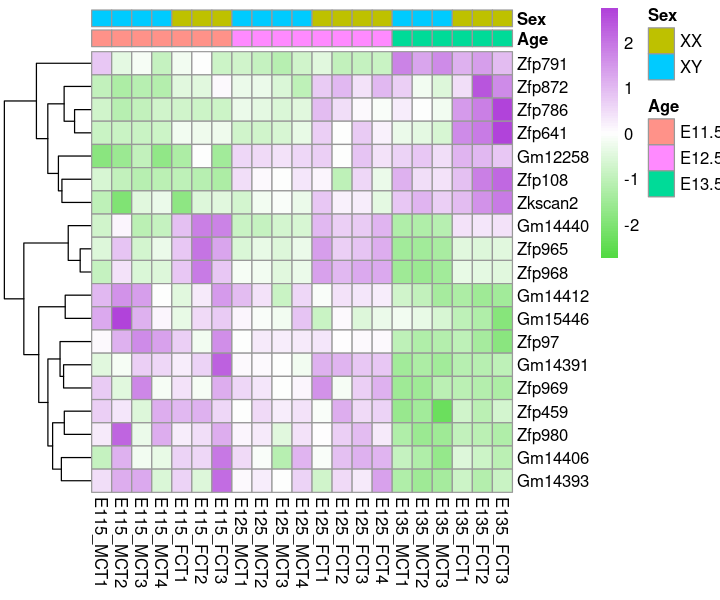

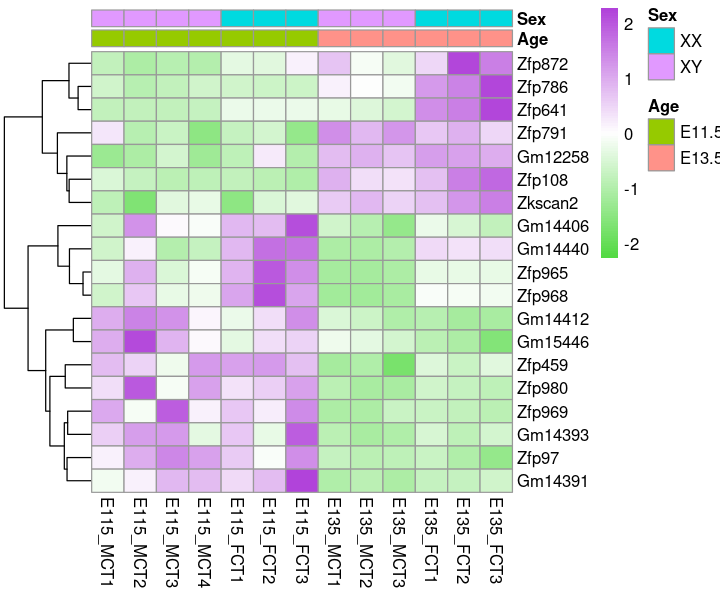

In [55]:
options(repr.plot.height = 5, repr.plot.width = 6)

p_share_1 <- pheatmap(shared, scale = "row", cluster_rows = T, cluster_cols = F, annotation_col = ann_col, color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))
p_share_2 <- pheatmap(shared_trim, scale = "row", cluster_rows = T, cluster_cols = F, annotation_col = ann_col_trim, color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))

In [56]:
pdf(file = 'M_and_F_KRABZFP_sig_rlog_zscore_E115E135.pdf', height = 5, width = 6)
p_share_2
dev.off()

png 
  2

png 
  2

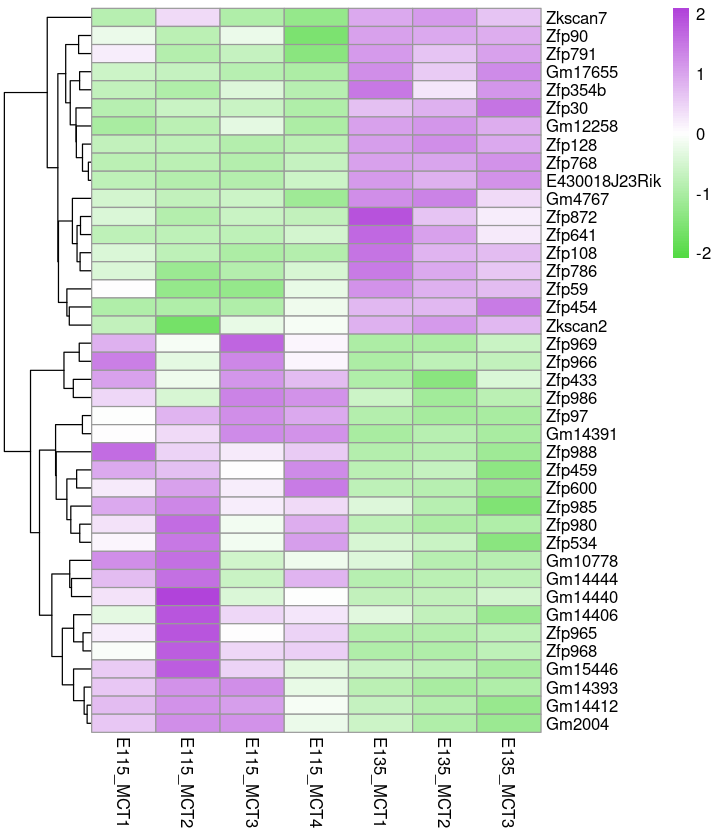

In [57]:
options(repr.plot.height = 7, repr.plot.width = 6)
p_males <- pheatmap(males, scale = "row", cluster_rows = T, cluster_cols = F,color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))
#
pdf(file = 'M_KRABZFP_sig_rlog_zscore_E115E135.pdf', height = 7, width = 6)
p_males
dev.off()

png 
  2

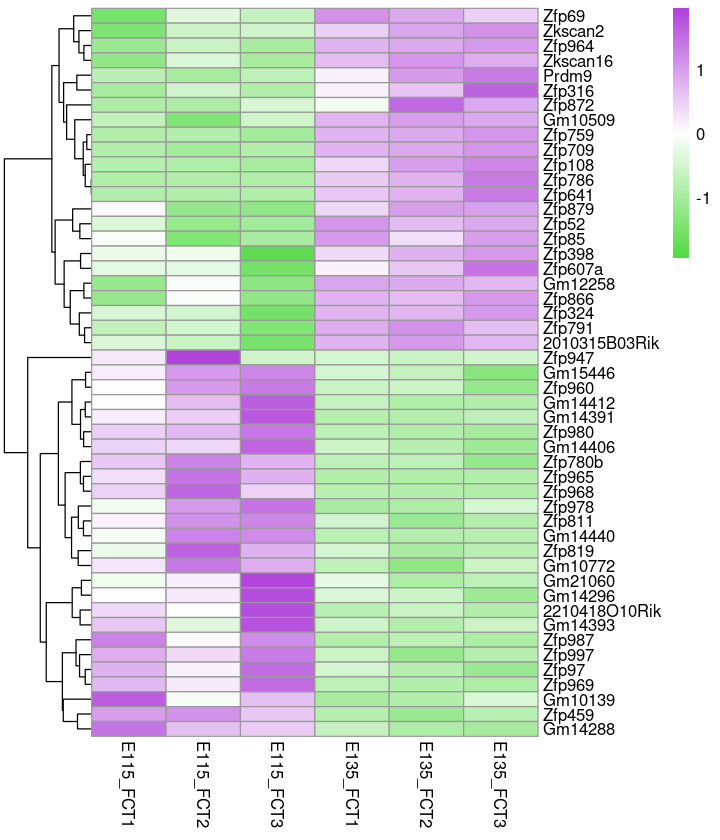

In [58]:
options(repr.plot.height = 7, repr.plot.width = 6)
p_females <- pheatmap(females, scale = "row", cluster_rows = T, cluster_cols = F,color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))
#
pdf(file = 'F_KRABZFP_sig_rlog_zscore_E115E135.pdf', height = 7, width = 6)
p_females
dev.off()

In [2]:
krab_zfps <- read.delim(file = 'KRAB_ZFP_list.csv', sep = ",", header = T)
krab_zfps

Label,Gene.ID,domain.configuration
<chr>,<chr>,<chr>
Zfp597,ENSMUSG00000039789,KRAB-ZNFs
Zfp94,ENSMUSG00000074282,KRAB-ZNFs
Zfp184,ENSMUSG00000006720,KRAB-ZNFs
Zfp30,ENSMUSG00000047473,KRAB-ZNFs
Gm26920,ENSMUSG00000058447,KRAB-ZNFs
Zfp69,ENSMUSG00000064141,KRAB-ZNFs
Zfp46,ENSMUSG00000051351,KRAB-ZNFs
Zfp213,ENSMUSG00000071256,SCAN-KRAB-ZNFs
Zfp2,ENSMUSG00000049321,KRAB-ZNFs


In [3]:
keep <- c(1,10:12,7:9,17:20,13:16)
fc_115 <- read.delim(file = 'e11.clean.rc.csv', sep = ",", header = T)
fc_115 <- fc_115[,keep]
cols <- c("Geneid", "E115_FCT1", "E115_FCT2", "E115_FCT3", "E115_FKO1", "E115_FKO2", "E115_FKO3", "E115_MCT1", "E115_MCT2", "E115_MCT3", "E115_MCT4", "E115_MKO1", "E115_MKO2", "E115_MKO3", "E115_MKO4")
colnames(fc_115) <- cols
head(fc_115)
#
keep <- c(1,7:10,11:14,15:18,19:21)
fc_125 <- read.delim(file = 'e12.clean.rc.csv', sep = ",", header = T)
fc_125 <- fc_125[,keep]
cols <- c("Geneid", "E125_FCT1", "E125_FCT2", "E125_FCT3","E125_FCT4","E125_FKO1","E125_FKO2","E125_FKO3", "E125_FKO4","E125_MCT1", "E125_MCT2", "E125_MCT3", "E125_MCT4", "E125_MKO1", "E125_MKO2", "E125_MKO4")
colnames(fc_125) <- cols
head(fc_125)
#
keep <- c(1,10:12,7:9,17:19,13:16)
fc_135 <- read.delim(file = 'e13.clean.rc.csv', sep = ",", header = T)
fc_135 <- fc_135[,keep]
cols <- c("Geneid", "E135_FCT1", "E135_FCT2", "E135_FCT3", "E135_FKO1", "E135_FKO2", "E135_FKO3", "E135_MCT1", "E135_MCT2", "E135_MCT3", "E135_MKO1", "E135_MKO2", "E135_MKO3", "E135_MKO4")
colnames(fc_135) <- cols
head(fc_135)

,Geneid,E115_FCT1,E115_FCT2,E115_FCT3,E115_FKO1,E115_FKO2,E115_FKO3,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E115_MKO1,E115_MKO2,E115_MKO3,E115_MKO4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,4863,5692,9615,12392,5107,4828,8098,6916,6044,11664,11221,11294,8760,6267
2,ENSMUSG00000026312,0,0,2,0,0,4,0,0,0,16,12,68,0,4
3,ENSMUSG00000039748,5536,6093,7546,4593,2843,5321,5806,7062,5615,6769,6732,6475,4721,1848
4,ENSMUSG00000104158,0,0,0,0,0,0,0,0,0,0,0,10,0,0
5,ENSMUSG00000057363,1030,2050,2379,2658,836,1246,3851,2732,1880,2298,2964,3252,2015,1352
6,ENSMUSG00000047216,34,2,12,46,16,16,6,18,2,2,41,90,134,420


,Geneid,E125_FCT1,E125_FCT2,E125_FCT3,E125_FCT4,E125_FKO1,E125_FKO2,E125_FKO3,E125_FKO4,E125_MCT1,E125_MCT2,E125_MCT3,E125_MCT4,E125_MKO1,E125_MKO2,E125_MKO4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,7013,9048,7762,9010,7289,9405,8982,12713,9686,10075,11433,12997,20323,20521,20089
2,ENSMUSG00000026312,20,0,13,10,86,0,0,45,2,6,0,16,4,0,0
3,ENSMUSG00000039748,5014,4177,5373,6828,2876,2729,3504,5431,10710,9538,13843,12899,6462,7133,9115
4,ENSMUSG00000104158,0,0,0,5,0,0,0,0,16,20,6,8,0,0,0
5,ENSMUSG00000057363,3548,2657,3254,3194,2088,1846,3337,4032,4546,4263,4076,4757,4488,3962,8422
6,ENSMUSG00000047216,4,2,4,6,83,23,30,72,18,6,2,8,58,84,104


,Geneid,E135_FCT1,E135_FCT2,E135_FCT3,E135_FKO1,E135_FKO2,E135_FKO3,E135_MCT1,E135_MCT2,E135_MCT3,E135_MKO1,E135_MKO2,E135_MKO3,E135_MKO4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,7353,4982,4885,11422,6376,5869,4078,6418,2935,9443,3192,2890,9581
2,ENSMUSG00000026312,4,2,40,3,0,4,20,82,6,8,0,2,2
3,ENSMUSG00000039748,16914,9950,14100,10202,5666,9321,4814,7607,5862,4843,2349,2253,4265
4,ENSMUSG00000104158,8,8,32,194,0,22,0,10,0,10,0,0,2
5,ENSMUSG00000057363,4593,3757,4009,7036,3119,2995,1472,2643,1829,1996,1062,919,2133
6,ENSMUSG00000047216,4,4,4,60,43,119,0,8,2,123,234,22,125


In [4]:
keep <- c(1,8:15)
males_115 <- fc_115[,keep]
head(males_115)
#
keep <- c(1,2:7)
females_115 <- fc_115[,keep]
head(females_115)

,Geneid,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E115_MKO1,E115_MKO2,E115_MKO3,E115_MKO4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,8098,6916,6044,11664,11221,11294,8760,6267
2,ENSMUSG00000026312,0,0,0,16,12,68,0,4
3,ENSMUSG00000039748,5806,7062,5615,6769,6732,6475,4721,1848
4,ENSMUSG00000104158,0,0,0,0,0,10,0,0
5,ENSMUSG00000057363,3851,2732,1880,2298,2964,3252,2015,1352
6,ENSMUSG00000047216,6,18,2,2,41,90,134,420


,Geneid,E115_FCT1,E115_FCT2,E115_FCT3,E115_FKO1,E115_FKO2,E115_FKO3
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,4863,5692,9615,12392,5107,4828
2,ENSMUSG00000026312,0,0,2,0,0,4
3,ENSMUSG00000039748,5536,6093,7546,4593,2843,5321
4,ENSMUSG00000104158,0,0,0,0,0,0
5,ENSMUSG00000057363,1030,2050,2379,2658,836,1246
6,ENSMUSG00000047216,34,2,12,46,16,16


In [7]:
keep <- c(1,10:16)
males_125 <- fc_125[,keep]
#
keep <- c(1,2:9)
females_125 <- fc_125[,keep]

In [8]:
keep <- c(1,8:14)
males_135 <- fc_135[,keep]
head(males_135)
#
keep <- c(1,2:7)
females_135 <- fc_135[,keep]
head(females_135)

,Geneid,E135_MCT1,E135_MCT2,E135_MCT3,E135_MKO1,E135_MKO2,E135_MKO3,E135_MKO4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,4078,6418,2935,9443,3192,2890,9581
2,ENSMUSG00000026312,20,82,6,8,0,2,2
3,ENSMUSG00000039748,4814,7607,5862,4843,2349,2253,4265
4,ENSMUSG00000104158,0,10,0,10,0,0,2
5,ENSMUSG00000057363,1472,2643,1829,1996,1062,919,2133
6,ENSMUSG00000047216,0,8,2,123,234,22,125


,Geneid,E135_FCT1,E135_FCT2,E135_FCT3,E135_FKO1,E135_FKO2,E135_FKO3
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000051285,7353,4982,4885,11422,6376,5869
2,ENSMUSG00000026312,4,2,40,3,0,4
3,ENSMUSG00000039748,16914,9950,14100,10202,5666,9321
4,ENSMUSG00000104158,8,8,32,194,0,22
5,ENSMUSG00000057363,4593,3757,4009,7036,3119,2995
6,ENSMUSG00000047216,4,4,4,60,43,119


In [9]:
samples <- list("males_115", "males_125", "males_135", "females_115", "females_125", "females_135")

for (s in samples){
    import <- get(s)
    import <- column_to_rownames(import, "Geneid")
    import <- as.matrix(import)
    assign(s, import)
}


In [10]:
colnames(females_135)

[1] "E135_FCT1" "E135_FCT2" "E135_FCT3" "E135_FKO1" "E135_FKO2" "E135_FKO3"

In [11]:
Con_115M <- factor(c(rep("Control",4), rep("TCKO", 4)))
Con_125M <- factor(c(rep("Control",4), rep("TCKO", 3)))
Con_135M <- factor(c(rep("Control",3), rep("TCKO", 4)))
#
Con_115F <- factor(c(rep("Control",3), rep("TCKO", 3)))
Con_125F <- factor(c(rep("Control",4), rep("TCKO", 4)))
Con_135F <- factor(c(rep("Control",3), rep("TCKO", 3)))
#
M115_coldata <- data.frame(row.names=colnames(males_115), Con_115M)
M125_coldata <- data.frame(row.names=colnames(males_125), Con_125M)
M135_coldata <- data.frame(row.names=colnames(males_135), Con_135M)
#
F115_coldata <- data.frame(row.names=colnames(females_115), Con_115F)
F125_coldata <- data.frame(row.names=colnames(females_125), Con_125F)
F135_coldata <- data.frame(row.names=colnames(females_135), Con_135F)

In [12]:
dds_males115 <- DESeqDataSetFromMatrix(countData=males_115, colData=M115_coldata, design=~Con_115M)
dds_males115 <- DESeq(dds_males115)
dds_males125 <- DESeqDataSetFromMatrix(countData=males_125, colData=M125_coldata, design=~Con_125M)
dds_males125 <- DESeq(dds_males125)
dds_males135 <- DESeqDataSetFromMatrix(countData=males_135, colData=M135_coldata, design=~Con_135M)
dds_males135 <- DESeq(dds_males135)
#
dds_females115 <- DESeqDataSetFromMatrix(countData=females_115, colData=F115_coldata, design=~Con_115F)
dds_females115 <- DESeq(dds_females115)
dds_females125 <- DESeqDataSetFromMatrix(countData=females_125, colData=F125_coldata, design=~Con_125F)
dds_females125 <- DESeq(dds_females125)
dds_females135 <- DESeqDataSetFromMatrix(countData=females_135, colData=F135_coldata, design=~Con_135F)
dds_females135 <- DESeq(dds_females135)
#
rld_males115 <- rlogTransformation(dds_males115)
rld_males125 <- rlogTransformation(dds_males125)
rld_males135 <- rlogTransformation(dds_males135)
#
rld_females115 <- rlogTransformation(dds_females115)
rld_females125 <- rlogTransformation(dds_females125)
rld_females135 <- rlogTransformation(dds_females135)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [13]:
##
Male_DE_115 <- results(dds_males115, contrast = c('Con_115M', 'TCKO', 'Control'))
Male_DE_115 <- Male_DE_115[order(Male_DE_115$padj), ]
M115_DE_Table <- merge(as.data.frame(Male_DE_115), as.data.frame(assay(rld_males115)), by="row.names", sort=FALSE)
names(M115_DE_Table)[1] <- "Gene"
(M115_DE_Table)
#
Male_DE_125 <- results(dds_males125, contrast = c('Con_125M', 'TCKO', 'Control'))
Male_DE_125 <- Male_DE_125[order(Male_DE_125$padj), ]
M125_DE_Table <- merge(as.data.frame(Male_DE_125), as.data.frame(assay(rld_males125)), by="row.names", sort=FALSE)
names(M125_DE_Table)[1] <- "Gene"
(M125_DE_Table)
#
Male_DE_135 <- results(dds_males135, contrast = c('Con_135M', 'TCKO', 'Control'))
Male_DE_135 <- Male_DE_135[order(Male_DE_135$padj), ]
M135_DE_Table <- merge(as.data.frame(Male_DE_135), as.data.frame(assay(rld_males135)), by="row.names", sort=FALSE)
names(M135_DE_Table)[1] <- "Gene"
(M135_DE_Table)
#
Female_DE_115 <- results(dds_females115, contrast = c('Con_115F', 'TCKO', 'Control'))
Female_DE_115 <- Female_DE_115[order(Female_DE_115$padj), ]
F115_DE_Table <- merge(as.data.frame(Female_DE_115), as.data.frame(assay(rld_females115)), by="row.names", sort=FALSE)
names(F115_DE_Table)[1] <- "Gene"
(F115_DE_Table)
#
Female_DE_125 <- results(dds_females125, contrast = c('Con_125F', 'TCKO', 'Control'))
Female_DE_125 <- Female_DE_125[order(Female_DE_125$padj), ]
F125_DE_Table <- merge(as.data.frame(Female_DE_125), as.data.frame(assay(rld_females125)), by="row.names", sort=FALSE)
names(F125_DE_Table)[1] <- "Gene"
(F125_DE_Table)
#
Female_DE_135 <- results(dds_females135, contrast = c('Con_135F', 'TCKO', 'Control'))
Female_DE_135 <- Female_DE_135[order(Female_DE_135$padj), ]
F135_DE_Table <- merge(as.data.frame(Female_DE_135), as.data.frame(assay(rld_females135)), by="row.names", sort=FALSE)
names(F135_DE_Table)[1] <- "Gene"
(F135_DE_Table)

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E115_MKO1,E115_MKO2,E115_MKO3,E115_MKO4
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000018924,1607.68396,5.961209,0.2532931,23.534824,1.795612e-122,2.479560e-118,6.669681,6.816647,6.842175,6.621998,10.814738,11.128611,11.115417,11.049686
ENSMUSG00000034239,1426.69548,5.987576,0.3511555,17.051068,3.432054e-65,2.369661e-61,6.356786,6.632109,6.355300,6.875840,10.838262,11.127738,10.820919,10.495569
ENSMUSG00000069456,736.29853,6.940152,0.4636951,14.967059,1.205342e-50,5.548190e-47,5.542612,5.597719,5.405502,5.306306,9.610687,9.146064,10.204245,9.742820
ENSMUSG00000025165,706.84158,6.385103,0.4953434,12.890255,5.107440e-38,1.763216e-34,5.731172,5.906272,5.793335,5.400805,9.617317,9.410004,9.178083,10.276688
ENSMUSG00000095620,627.11340,6.103800,0.4989199,12.234029,2.045351e-34,5.648849e-31,5.554858,5.982328,5.791120,5.810603,9.231317,9.484082,10.107322,8.904603
ENSMUSG00000079554,417.27164,5.255521,0.4676586,11.237942,2.654995e-29,6.110472e-26,6.064614,6.223974,5.941204,5.809069,8.471603,9.267156,8.971511,8.831202
ENSMUSG00000031981,808.02303,5.895661,0.5901846,9.989519,1.694012e-23,3.341802e-20,5.633804,5.904413,6.157845,6.353819,9.285608,9.696897,9.234492,10.755896
ENSMUSG00000035929,168.39866,8.017665,0.8309214,9.649125,4.957711e-22,8.557629e-19,5.352027,5.320508,5.365281,5.291966,7.314402,7.476616,7.431989,7.475192
ENSMUSG00000056978,201.63071,6.240926,0.6571521,9.496928,2.161729e-21,3.316814e-18,5.554575,5.415356,5.385782,5.444797,8.182669,7.446070,7.624094,7.363116


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E125_MCT1,E125_MCT2,E125_MCT3,E125_MCT4,E125_MKO1,E125_MKO2,E125_MKO4
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000036292,2448.9861,4.969126,0.1685758,29.47711,5.658962e-191,9.055471e-187,8.404494,8.552706,8.425130,8.372806,11.676515,11.618593,11.796821
ENSMUSG00000005566,14651.2251,-3.410692,0.1562852,-21.82351,1.387972e-105,1.110517e-101,14.195882,14.033032,14.317844,14.178287,11.685362,11.891578,11.882105
ENSMUSG00000010592,13548.5338,-4.008727,0.1873086,-21.40172,1.287565e-101,6.867871e-98,13.936915,14.132865,14.156855,13.963556,11.073867,11.407619,11.391335
ENSMUSG00000025165,1016.2544,5.916339,0.2830441,20.90253,5.077918e-97,2.031421e-93,6.810421,7.026444,6.915638,6.987021,9.997836,10.468803,10.290285
ENSMUSG00000035606,885.1754,6.025550,0.3031841,19.87422,6.802903e-88,2.177201e-84,6.622046,6.859048,6.842940,6.769215,9.818293,10.044631,10.231236
ENSMUSG00000009292,1110.2408,5.595341,0.2908614,19.23714,1.809282e-82,4.825355e-79,7.093804,7.238764,7.070292,7.295477,10.068711,10.596409,10.547473
ENSMUSG00000039853,1885.7771,4.625888,0.2458273,18.81763,5.414943e-79,1.237856e-75,8.315910,8.537744,8.158236,8.336470,11.145509,11.546025,11.223400
ENSMUSG00000022181,1170.9033,5.629040,0.3080540,18.27290,1.360171e-74,2.720683e-71,7.120375,7.438848,7.050455,7.192325,10.442803,10.291555,10.745374
ENSMUSG00000018924,2369.8663,5.354463,0.2970680,18.02436,1.254444e-72,2.230401e-69,7.780893,8.308592,8.241823,8.100635,11.469803,11.877880,11.453307


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E135_MCT1,E135_MCT2,E135_MCT3,E135_MKO1,E135_MKO2,E135_MKO3,E135_MKO4
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000110333,2885.5360,6.040735,0.2703927,22.34060,1.490334e-110,2.310018e-106,8.063528,7.855724,8.150534,11.311147,11.597930,12.007624,11.683723
ENSMUSG00000001025,1162.2625,4.547938,0.2067160,22.00090,2.823245e-107,1.892336e-103,7.815103,7.766846,7.806144,10.534363,10.490744,10.307606,10.255145
ENSMUSG00000036292,4341.1040,5.566159,0.2531327,21.98909,3.662586e-107,1.892336e-103,8.935107,8.729629,8.660940,11.836996,12.503802,12.305443,12.449895
ENSMUSG00000022912,1266.1600,5.122206,0.2615329,19.58532,2.063140e-85,7.994666e-82,7.484822,7.689448,7.572283,10.287135,10.760460,10.560260,10.322231
ENSMUSG00000039543,2403.9265,4.825634,0.2506444,19.25291,1.334476e-82,4.136876e-79,8.566932,8.461309,8.378864,11.197056,11.838933,11.268014,11.461218
ENSMUSG00000031576,826.6595,3.815181,0.2031024,18.78452,1.011020e-78,2.611801e-75,7.798926,7.801889,7.813654,10.021720,9.781143,9.925059,9.948607
ENSMUSG00000031981,490.0399,5.557815,0.2964264,18.74939,1.958071e-78,3.793762e-75,6.719960,6.607083,6.633129,8.995563,9.069503,8.938926,9.175928
ENSMUSG00000025165,894.4006,6.729707,0.3587972,18.75630,1.719742e-78,3.793762e-75,6.758100,6.653545,6.625147,9.364929,9.912409,10.158935,10.027211
ENSMUSG00000035606,503.7667,5.572938,0.2986553,18.66010,1.045278e-77,1.800202e-74,6.653816,6.644788,6.684466,8.966731,8.960163,9.139777,9.257367


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_FCT1,E115_FCT2,E115_FCT3,E115_FKO1,E115_FKO2,E115_FKO3
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000005566,9489.8778,-4.826041,0.3893005,-12.396698,2.723166e-35,3.634882e-31,13.855050,13.874785,13.273918,9.932733,10.224670,9.832090
ENSMUSG00000034239,831.3268,5.042572,0.5070606,9.944713,2.659401e-23,1.774884e-19,6.804114,6.496759,6.701926,9.468532,10.120999,10.370613
ENSMUSG00000022297,664.3322,5.662383,0.6680435,8.476069,2.329300e-17,1.036383e-13,6.387539,6.030823,5.519558,9.445759,10.051435,9.305246
ENSMUSG00000018924,1885.2970,4.992947,0.6147112,8.122427,4.569533e-16,1.524853e-12,8.263455,7.226942,7.044708,11.477302,11.108844,11.250064
ENSMUSG00000030577,758.6556,3.982399,0.5456132,7.298941,2.900415e-13,7.548605e-10,7.420330,6.920744,7.416433,9.439995,10.367009,9.866981
ENSMUSG00000062687,237.0102,4.642640,0.6379183,7.277798,3.393140e-13,7.548605e-10,5.825611,5.796768,5.777941,7.935096,8.475332,7.637596
ENSMUSG00000033498,418.4737,6.639709,1.0039912,6.613314,3.758091e-11,6.270374e-08,4.971267,5.138617,4.680415,6.566243,9.526018,8.645564
ENSMUSG00000020432,275.3928,6.050643,0.9131872,6.625852,3.452511e-11,6.270374e-08,5.298625,5.091384,4.974655,8.955609,7.196127,7.483577
ENSMUSG00000038058,268.7895,5.570167,0.8598788,6.477851,9.303834e-11,1.379862e-07,5.489871,5.204308,5.301218,8.914509,7.331017,7.507976


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E125_FCT1,E125_FCT2,E125_FCT3,E125_FCT4,E125_FKO1,E125_FKO2,E125_FKO3,E125_FKO4
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000036292,1066.4042,4.876106,0.2667166,18.28197,1.151805e-74,1.709739e-70,7.349174,7.208882,7.591739,7.233747,10.156671,10.445805,10.389787,10.452078
ENSMUSG00000009292,637.2390,5.947928,0.3358677,17.70914,3.564739e-70,2.645749e-66,6.531987,6.367064,6.352139,6.369477,9.155860,9.338087,9.628003,9.757833
ENSMUSG00000031981,776.1839,5.991493,0.3442324,17.40537,7.511770e-68,3.716824e-64,6.579221,6.481262,6.406248,6.501963,9.916944,9.581541,9.356766,10.168043
ENSMUSG00000034839,369.6712,5.653718,0.3257330,17.35691,1.748863e-67,6.490029e-64,6.262088,6.246755,6.245485,6.322216,8.686058,8.739613,8.653387,8.559608
ENSMUSG00000091813,388.5686,6.167530,0.3676116,16.77730,3.577401e-63,1.062059e-59,6.162953,6.218496,6.117999,6.093819,8.604341,8.686628,8.593296,8.940611
ENSMUSG00000034416,1280.1992,5.236813,0.3135846,16.69984,1.314059e-62,3.250982e-59,7.168387,7.453565,7.006562,7.538740,10.583680,10.870327,10.466539,10.544299
ENSMUSG00000022197,2121.5755,3.570086,0.2182774,16.35573,3.959430e-60,8.396253e-57,9.286359,8.793583,8.901403,9.032385,11.460632,11.476590,11.480982,11.519009
ENSMUSG00000092232,1161.6681,4.153420,0.2562158,16.21063,4.241782e-59,7.870627e-56,7.838695,7.768889,8.016748,7.922981,10.766378,10.556008,10.156659,10.592780
ENSMUSG00000010592,6615.8203,-4.804336,0.2994623,-16.04321,6.377516e-58,1.051865e-54,13.695380,12.677364,12.817179,13.022050,9.832824,9.442658,9.562649,9.612461


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E135_FCT1,E135_FCT2,E135_FCT3,E135_FKO1,E135_FKO2,E135_FKO3
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000018924,2192.1952,5.344870,0.2307191,23.16613,9.998247e-119,1.603919e-114,8.040924,8.117063,8.098382,11.498529,11.200025,11.427109
ENSMUSG00000054196,1273.9460,5.125823,0.2698674,18.99386,1.917148e-80,1.537745e-76,7.482177,7.640963,7.642104,10.421629,10.583291,10.708961
ENSMUSG00000075610,2015.1550,5.494446,0.3048994,18.02052,1.344696e-72,7.190538e-69,7.809521,8.006226,7.845763,11.270094,11.481592,10.903512
ENSMUSG00000039853,1491.0322,4.049373,0.2286340,17.71116,3.439142e-70,1.379268e-66,8.448676,8.384046,8.365088,11.012764,10.746782,10.860649
ENSMUSG00000025946,958.3363,5.851540,0.3503901,16.70007,1.309079e-62,4.200050e-59,6.837952,7.131176,6.869147,10.214318,9.969294,10.102531
ENSMUSG00000039543,2137.6077,4.845397,0.3029364,15.99477,1.389802e-57,3.715867e-54,8.246824,8.384046,8.397320,11.351863,11.654424,11.016578
ENSMUSG00000070890,1504.7558,5.938029,0.3729486,15.92184,4.470185e-57,1.024439e-53,7.223782,7.455464,7.255053,10.468913,11.163842,10.547748
ENSMUSG00000009292,1041.1174,5.281392,0.3549433,14.87954,4.475905e-50,8.975308e-47,7.058598,7.429719,7.367515,10.235224,10.234946,10.306043
ENSMUSG00000070619,2024.9326,5.846691,0.3959186,14.76740,2.376918e-49,4.236725e-46,7.488246,7.892234,7.619215,11.596924,11.114900,10.814925


In [14]:
#use biomaRt to convert the Ensembl IDs that featurecounts used to Gene names. The alignment was done using mm10, so we will use db version 102, which is the mm10 annotation.
ensembl <- useEnsembl(biomart = 'genes', dataset = 'mmusculus_gene_ensembl', version = 109)
ensembl
#
annotLookup <- getBM(mart = ensembl, attributes = c('ensembl_gene_id','gene_biotype','external_gene_name'), uniqueRows = TRUE)
df <- c(1,3)
annotLookup_gene <- annotLookup[,df]
annotLookup_gene

Object of class 'Mart':
  Using the ENSEMBL_MART_ENSEMBL BioMart database
  Using the mmusculus_gene_ensembl dataset

ensembl_gene_id,external_gene_name
<chr>,<chr>
ENSMUSG00000064336,mt-Tf
ENSMUSG00000064337,mt-Rnr1
ENSMUSG00000064338,mt-Tv
ENSMUSG00000064339,mt-Rnr2
ENSMUSG00000064340,mt-Tl1
ENSMUSG00000064341,mt-Nd1
ENSMUSG00000064342,mt-Ti
ENSMUSG00000064343,mt-Tq
ENSMUSG00000064344,mt-Tm


In [27]:
samples <- list("M115_DE_Table", "M125_DE_Table", "M135_DE_Table", "F115_DE_Table", "F125_DE_Table", "F135_DE_Table")

for (s in samples){
    import <- get(s)
    import_merge <- inner_join(import, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
    import_merge <- filter(import_merge, Gene %in% krab_zfps$Gene.ID)
    keep <- c(1,ncol(import_merge), 2:(ncol(import_merge)-1))
    import_merge <- import_merge[,keep]
    import_merge <- filter(import_merge, abs(log2FoldChange) > 2, padj < 0.05)
    assign(paste("KRAB", s, sep = "_"), import_merge)
}

for (s in samples){
    import <- get(s)
    import_merge <- inner_join(import, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
    import_merge <- filter(import_merge, Gene %in% krab_zfps$Gene.ID)
    keep <- c(1,ncol(import_merge), 2:(ncol(import_merge)-1))
    import_merge <- import_merge[,keep]
    assign(paste("All", s, sep = "_"), import_merge)
}


In [45]:
colnames(KRAB_F115_DE_Table)

[1] "Gene"               "external_gene_name" "baseMean"          
 [4] "log2FoldChange"     "lfcSE"              "stat"              
 [7] "pvalue"             "padj"               "E115_FCT1"         
[10] "E115_FCT2"          "E115_FCT3"          "E115_FKO1"         
[13] "E115_FKO2"          "E115_FKO3"

In [96]:
keep <- c(2,9:14)
KRAB_F135 <- KRAB_F135_DE_Table[,keep]
All_F115 <- All_F115_DE_Table[,keep]
#F_KRAB_Merge <- KRAB_F135
F_KRAB_Merge <- left_join(KRAB_F_E135, All_F115, by = c("external_gene_name"))
F_KRAB_Merge <- column_to_rownames(F_KRAB_Merge, "external_gene_name")
F_KRAB_Merge <- as.matrix(F_KRAB_Merge)
#keep <- c(7:9 , 1:6)
keep <- c(1:6)
F_KRAB_Merge
F_KRAB_Merge <- F_KRAB_Merge[,keep]
F_KRAB_Merge

,E135_FCT1,E135_FCT2,E135_FCT3,E135_FKO1,E135_FKO2,E135_FKO3,E115_FCT1,E115_FCT2,E115_FCT3,E115_FKO1,E115_FKO2,E115_FKO3
Zfp980,7.868585,7.773322,7.690367,9.254159,9.084447,9.551759,7.973708,8.145485,8.644788,7.739334,7.853826,8.157283
Zfp986,7.587533,7.781063,7.722546,9.337008,9.412237,8.915965,7.310742,7.365430,7.390742,8.199852,8.063267,8.259951
Zfp985,10.141452,9.965981,9.560459,11.753541,11.395165,11.427520,9.772803,9.597202,9.571281,10.293734,10.811950,10.890224
Gm15446,8.422618,8.289480,7.893884,9.308528,9.715681,9.657235,8.477259,9.105294,9.263589,9.938022,10.088118,9.709417
Zfp37,9.523641,8.849924,9.401077,10.822030,10.533967,10.563949,9.682983,9.708280,9.255781,11.095292,10.568890,10.387117
Zfp934,8.226080,8.337008,7.792125,9.496047,9.216925,9.401505,7.219761,7.014302,7.533873,6.941715,7.361913,7.929860
Gm49359,5.550701,5.578506,5.605469,6.027345,6.360489,5.959049,4.393730,4.390693,4.488796,4.727272,4.517730,4.739095
Gm14412,7.561676,7.414008,7.445584,9.031304,8.204071,8.223711,7.664070,8.205784,9.046363,7.101958,9.267625,8.860242
Zfp641,6.896838,7.096396,7.871895,5.938757,6.376251,5.968935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zfp963,6.377734,6.308872,6.637073,5.695562,5.898202,5.809079,5.126253,4.976182,5.579860,5.340200,5.477971,6.482739


,E135_FCT1,E135_FCT2,E135_FCT3,E135_FKO1,E135_FKO2,E135_FKO3
Zfp980,7.868585,7.773322,7.690367,9.254159,9.084447,9.551759
Zfp986,7.587533,7.781063,7.722546,9.337008,9.412237,8.915965
Zfp985,10.141452,9.965981,9.560459,11.753541,11.395165,11.427520
Gm15446,8.422618,8.289480,7.893884,9.308528,9.715681,9.657235
Zfp37,9.523641,8.849924,9.401077,10.822030,10.533967,10.563949
Zfp934,8.226080,8.337008,7.792125,9.496047,9.216925,9.401505
Gm49359,5.550701,5.578506,5.605469,6.027345,6.360489,5.959049
Gm14412,7.561676,7.414008,7.445584,9.031304,8.204071,8.223711
Zfp641,6.896838,7.096396,7.871895,5.938757,6.376251,5.968935
Zfp963,6.377734,6.308872,6.637073,5.695562,5.898202,5.809079


In [ ]:
#Make a master object with scaled RLD across all samples per sex. 

In [78]:
Female_All <- full_join(fc_115, fc_125)
Female_All <- full_join(Female_All, fc_135, by = c("Geneid"))
keep <- c(1,2:7,16:23,31:36)
Female_All <- Female_All[,keep]
Female_All <- column_to_rownames(Female_All, "Geneid")
Female_All <- Female_All %>% mutate_all(~replace(., is.na(.), 0))
#
Male_All <- full_join(fc_115, fc_125)
Male_All <- full_join(Male_All, fc_135, by = c("Geneid"))
keep <- c(1,8:15,24:30,37:43)
Male_All <- Male_All[,keep]
Male_All <- column_to_rownames(Male_All, "Geneid")
Male_All <- Male_All %>% mutate_all(~replace(., is.na(.), 0))
colnames(Male_All)

Joining, by = "Geneid"
Joining, by = "Geneid"


[1] "E115_MCT1" "E115_MCT2" "E115_MCT3" "E115_MCT4" "E115_MKO1" "E115_MKO2"
 [7] "E115_MKO3" "E115_MKO4" "E125_MCT1" "E125_MCT2" "E125_MCT3" "E125_MCT4"
[13] "E125_MKO1" "E125_MKO2" "E125_MKO4" "E135_MCT1" "E135_MCT2" "E135_MCT3"
[19] "E135_MKO1" "E135_MKO2" "E135_MKO3" "E135_MKO4"

In [79]:
Con_Female <- factor(c(rep("E115",6), rep("E125", 8), rep("E135", 6)))
Con_Geno <- factor(c(rep("Control", 3), rep("TCKO", 3), rep("Control", 4), rep("TCKO", 4), rep("Control", 3), rep("TCKO", 3)))
#
Female_coldata <- data.frame(row.names=colnames(Female_All), Con_Female, Con_Geno)
Female_coldata
#
Con_Male <- factor(c(rep("E115",8), rep("E125", 7), rep("E135", 7)))
Con_Geno <- factor(c(rep("Control", 4), rep("TCKO", 4), rep("Control", 4), rep("TCKO", 3), rep("Control", 3), rep("TCKO", 4)))
#
Male_coldata <- data.frame(row.names=colnames(Male_All), Con_Male, Con_Geno)
Male_coldata

,Con_Female,Con_Geno
,<fct>,<fct>
E115_FCT1,E115,Control
E115_FCT2,E115,Control
E115_FCT3,E115,Control
E115_FKO1,E115,TCKO
E115_FKO2,E115,TCKO
E115_FKO3,E115,TCKO
E125_FCT1,E125,Control
E125_FCT2,E125,Control
E125_FCT3,E125,Control


,Con_Male,Con_Geno
,<fct>,<fct>
E115_MCT1,E115,Control
E115_MCT2,E115,Control
E115_MCT3,E115,Control
E115_MCT4,E115,Control
E115_MKO1,E115,TCKO
E115_MKO2,E115,TCKO
E115_MKO3,E115,TCKO
E115_MKO4,E115,TCKO
E125_MCT1,E125,Control


In [80]:
dds_males_tcko <- DESeqDataSetFromMatrix(countData=Male_All, colData=Male_coldata, design=~Con_Male)
dds_males_tcko <- DESeq(dds_males_tcko)
dds_females_tcko <- DESeqDataSetFromMatrix(countData=Female_All, colData=Female_coldata, design=~Con_Female)
dds_females_tcko <- DESeq(dds_females_tcko)
#
rld_male_tcko <- rlogTransformation(dds_males_tcko)
rld_female_tcko <- rlogTransformation(dds_females_tcko)

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1122 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1087 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [81]:
Male_All <- results(dds_males_tcko, contrast = c('Con_Male', 'E115', 'E135'))
Male_All <- Male_All[order(Male_All$padj), ]
Male_All_DE <- merge(as.data.frame(Male_All), as.data.frame(assay(rld_male_tcko)), by="row.names", sort=FALSE)
names(Male_All_DE)[1] <- "Gene"
(Male_All_DE)
#
Female_All <- results(dds_females_tcko, contrast = c('Con_Female', 'E115', 'E135'))
Female_All <- Female_All[order(Female_All$padj), ]
Female_All_DE <- merge(as.data.frame(Female_All), as.data.frame(assay(rld_female_tcko)), by="row.names", sort=FALSE)
names(Female_All_DE)[1] <- "Gene"
(Female_All_DE)

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_MCT1,E115_MCT2,E115_MCT3,⋯,E125_MKO1,E125_MKO2,E125_MKO4,E135_MCT1,E135_MCT2,E135_MCT3,E135_MKO1,E135_MKO2,E135_MKO3,E135_MKO4
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000025716,7041.5070,4.177517,0.2010879,20.77458,7.350477e-96,1.264503e-91,12.670670,12.973748,12.929053,⋯,13.129829,13.017492,13.675819,9.756671,9.836662,9.272596,9.879451,10.110861,9.788491,10.117839
ENSMUSG00000094796,242.1841,3.371623,0.1779027,18.95206,4.245973e-80,3.652174e-76,8.152853,8.215836,8.178869,⋯,7.756226,7.787257,8.051103,6.432894,6.184233,6.228153,6.462898,6.516001,6.749146,6.403261
ENSMUSG00000058932,242.3035,4.572137,0.2554796,17.89629,1.260409e-71,7.227606e-68,8.227850,8.426876,8.341895,⋯,7.366834,7.634672,7.887822,6.064785,5.863001,5.923509,5.801039,6.112695,6.006356,5.924159
ENSMUSG00000052372,114529.9808,-10.119067,0.5664931,-17.86265,2.304358e-71,9.910468e-68,7.563576,9.947133,9.600970,⋯,9.371527,10.186994,9.418273,17.737622,16.258682,17.102555,16.738742,17.637308,17.410033,18.025724
ENSMUSG00000070713,178.4992,4.190120,0.2657013,15.77004,5.002041e-56,1.721002e-52,7.520514,7.528887,7.473869,⋯,7.447958,7.509633,7.411790,5.742230,5.666396,5.958878,5.745656,6.062498,5.925905,5.744337
ENSMUSG00000056880,2543.6809,2.262095,0.1453898,15.55883,1.386037e-54,3.973998e-51,11.581210,11.805477,11.778946,⋯,10.980678,11.331161,11.057820,10.163799,10.126728,9.830578,9.570222,10.241134,10.243540,10.092151
ENSMUSG00000028194,2257.8943,2.004914,0.1290123,15.54048,1.845883e-54,4.536388e-51,11.364664,11.711399,11.699474,⋯,10.986617,11.029483,11.002245,10.100488,9.985280,9.878205,9.805807,10.311998,10.358656,9.906994
ENSMUSG00000028028,724.0019,2.636835,0.1750869,15.06015,2.961257e-51,6.367814e-48,9.417873,9.782058,10.306746,⋯,9.251001,9.413096,9.681734,8.016889,8.074072,7.819326,8.113522,8.280806,8.223890,8.075406
ENSMUSG00000058174,1489.5373,2.124398,0.1413463,15.02974,4.688491e-51,8.961790e-48,11.068942,11.247636,10.955733,⋯,10.619196,10.476023,10.462804,9.294195,9.418457,9.297910,9.282024,9.350296,9.730689,9.621770


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,E115_FCT1,E115_FCT2,E115_FCT3,⋯,E125_FKO1,E125_FKO2,E125_FKO3,E125_FKO4,E135_FCT1,E135_FCT2,E135_FCT3,E135_FKO1,E135_FKO2,E135_FKO3
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000058126,746.39110,4.548996,0.2918994,15.584123,9.333515e-55,1.506709e-50,10.439777,9.963246,9.921694,⋯,9.111639,9.107906,8.578860,9.064397,7.396415,6.664991,6.835597,7.143934,6.981635,7.270763
ENSMUSG00000058932,176.83533,4.101440,0.2885721,14.212879,7.622610e-46,6.152590e-42,7.831747,7.507138,8.018469,⋯,7.712804,7.491109,7.471988,7.261029,5.812961,5.833249,5.809338,5.939211,5.572721,5.877786
ENSMUSG00000056880,2223.38591,2.117901,0.1599148,13.243938,4.891549e-40,2.632143e-36,11.473981,11.128851,11.862887,⋯,11.264729,11.331714,11.344854,11.292289,10.132361,9.929134,9.906620,10.014399,9.709239,9.775568
ENSMUSG00000052372,110340.96706,-10.983382,0.8492552,-12.932958,2.933137e-38,1.183741e-34,8.042042,7.678823,8.429488,⋯,9.653274,9.697337,8.022896,8.122978,14.052592,16.720814,16.116915,16.812662,17.852980,17.008048
ENSMUSG00000025716,7747.13568,4.463439,0.3686304,12.108170,9.560301e-34,3.086639e-30,12.478958,12.364182,13.562489,⋯,13.404764,13.334028,13.270101,13.025272,9.736962,9.058198,8.595204,9.656262,10.056033,9.663635
ENSMUSG00000037624,583.74857,1.863493,0.1627820,11.447783,2.412354e-30,6.490438e-27,9.431966,9.827940,9.624840,⋯,9.347772,9.211120,9.454493,9.430322,8.315894,8.175024,8.251188,8.171479,8.258443,8.294149
ENSMUSG00000089717,136.68743,2.870641,0.2669210,10.754645,5.635085e-27,1.299531e-23,7.079926,7.426111,7.368353,⋯,7.062202,6.891157,7.368705,7.073432,5.939046,5.874195,5.881081,6.174842,6.202595,6.142083
ENSMUSG00000079264,4485.81504,2.765905,0.2582681,10.709433,9.192264e-27,1.854884e-23,12.581629,12.283550,12.730280,⋯,12.315961,12.738100,12.503285,12.516315,10.404826,10.109676,10.026259,10.811733,10.485007,10.556067
ENSMUSG00000096002,154.98644,3.133697,0.2995905,10.459934,1.319470e-25,2.366689e-22,7.524858,7.553767,7.597662,⋯,7.017466,7.488400,6.703317,6.497341,6.119105,5.969216,6.062120,6.147724,6.164477,6.194060


In [90]:
samples <- list("Male_All_DE", "Female_All_DE")

for (s in samples){
    import <- get(s)
    import_merge <- inner_join(import, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
    import_merge <- filter(import_merge, Gene %in% krab_zfps$Gene.ID)
    keep <- c(1,ncol(import_merge), 2:(ncol(import_merge)-1))
    import_merge <- import_merge[,keep]
    assign(paste("rldall", s, sep = "_"), import_merge)
}

In [134]:
filter <- as.data.frame(F_KRAB_Merge)
filter <- rownames_to_column(filter, "Geneid")
#
keep <- c(2,9:28)
KRAB_All <- rldall_Female_All_DE[,keep]
KRAB_All <- filter(KRAB_All, external_gene_name %in% filter$Geneid)
KRAB_All <- column_to_rownames(KRAB_All, "external_gene_name")
KRAB_All <- as.matrix(KRAB_All)
keep <- c(1:3 , 15:20)
KRAB_All <- KRAB_All[,keep]
KRAB_All

,E115_FCT1,E115_FCT2,E115_FCT3,E135_FCT1,E135_FCT2,E135_FCT3,E135_FKO1,E135_FKO2,E135_FKO3
Zfp641,3.349270,3.347208,3.347127,4.436539,4.562137,4.791613,3.420530,3.974747,3.459539
Gm14412,7.635426,8.211288,9.082082,7.067600,6.884790,6.925928,8.791553,7.879917,7.884698
Gm15446,8.451411,9.125070,9.283769,7.927387,7.778123,7.249418,8.960535,9.452183,9.365536
Gm14409,6.465733,5.805309,6.871349,6.017908,5.931155,5.605439,6.876307,6.489897,6.591461
Zfp37,9.794705,9.817002,9.334164,8.993156,8.193875,8.866025,10.435192,10.155777,10.166683
Gm21060,5.263858,5.385988,6.085960,5.206842,4.983438,5.053830,6.134038,5.688842,5.774232
Zfp934,7.626676,7.349586,8.012276,7.472459,7.631749,6.898278,8.963643,8.681152,8.870215
Gm49359,4.779866,4.770831,4.981641,4.639796,4.707583,4.769595,5.478350,6.009804,5.383656
Zfp963,5.052588,4.836790,5.628270,5.782157,5.707650,6.117852,4.790656,5.131715,4.985550
Zfp986,7.509287,7.573034,7.596206,6.870776,7.135250,7.058956,8.905053,9.021058,8.453411


png 
  2

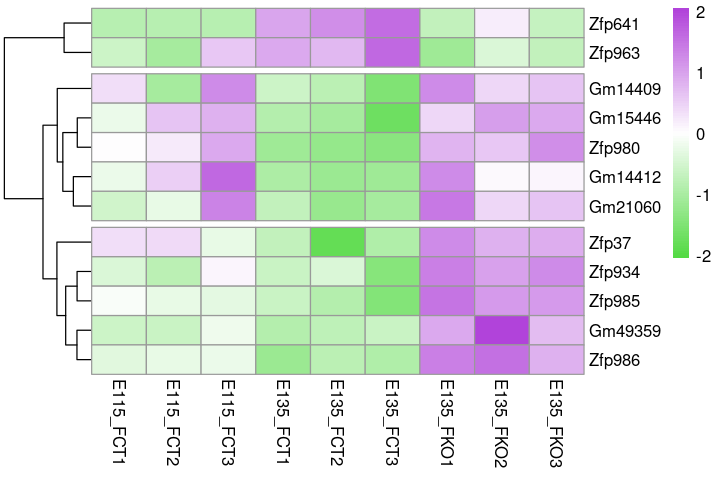

In [135]:
options(repr.plot.height = 4, repr.plot.width = 6)
p_females <- pheatmap(KRAB_All, scale = "row", cluster_rows = T, cluster_cols = F, cutree_rows = 3 ,color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))
#
pdf(file = 'Female_AllTimes_T28KO_Zfp.pdf', height = 4, width = 6)
p_females
dev.off()

In [136]:
filter <- as.data.frame(M_KRAB_Merge)
filter <- rownames_to_column(filter, "Geneid")
#
keep <- c(2,9:30)
KRAB_All <- rldall_Male_All_DE[,keep]
KRAB_All <- filter(KRAB_All, external_gene_name %in% filter$Geneid)
KRAB_All <- column_to_rownames(KRAB_All, "external_gene_name")
KRAB_All <- as.matrix(KRAB_All)
KRAB_All
keep <- c(1:3 , 16:22)
KRAB_All <- KRAB_All[,keep]
KRAB_All

,E115_MCT1,E115_MCT2,E115_MCT3,E115_MCT4,E115_MKO1,E115_MKO2,E115_MKO3,E115_MKO4,E125_MCT1,E125_MCT2,⋯,E125_MKO1,E125_MKO2,E125_MKO4,E135_MCT1,E135_MCT2,E135_MCT3,E135_MKO1,E135_MKO2,E135_MKO3,E135_MKO4
Gm21060,5.585231,5.901751,5.357881,5.612598,9.865259,7.161677,6.945022,6.908899,5.754712,5.480920,⋯,7.076254,6.753240,7.096657,5.067563,5.421192,5.091906,6.174318,6.375856,6.056781,6.565146
Zfp985,10.894050,11.329646,9.998344,10.280580,11.190817,10.665169,11.204988,11.303605,10.313198,9.411283,⋯,11.637675,10.899955,11.661376,9.354829,8.814974,8.006091,9.785242,11.104621,10.321356,10.688388
Gm15446,9.586740,10.734506,9.503583,8.768206,9.375594,10.575355,11.075941,9.770343,8.732858,8.597406,⋯,9.871724,10.267815,10.155023,8.494671,8.366386,8.146396,10.123433,10.301002,9.693870,9.579042
Zfp872,4.866114,4.694442,4.785461,4.751070,6.815641,5.274899,5.811998,4.797166,5.234394,5.243247,⋯,6.117332,6.131445,5.339436,5.883068,5.310499,5.125507,6.074171,7.282738,6.124238,6.465310
Zfp54,5.048251,4.785894,5.115785,4.778263,4.863784,5.589152,5.816774,5.125906,5.182826,5.557286,⋯,6.316288,5.362634,6.807781,4.869441,4.961514,5.250311,5.826753,5.327924,5.840099,6.057752
Gm49359,4.989018,5.075604,4.910145,4.842860,5.664204,5.852105,6.029606,5.698402,4.935397,4.990129,⋯,6.059384,6.190150,6.081558,4.987397,4.844113,4.906842,6.197589,6.366787,6.494062,6.398141
Zfp57,5.243548,5.462362,5.352510,6.382777,6.227157,8.227113,6.319547,7.764922,5.611996,6.492357,⋯,6.286608,6.224494,5.885471,5.561147,5.832420,5.920216,7.106478,5.442953,7.467532,6.436616
Zfp986,7.854007,7.170659,8.532968,8.437196,8.338239,8.082544,8.909815,6.834282,8.090107,8.024023,⋯,9.135391,8.997698,8.680405,7.103498,6.726490,6.933526,8.347650,8.902441,8.949095,9.155341
Gm14444,5.439137,5.862310,4.855437,5.468297,4.781754,5.035696,5.000856,4.821366,5.267534,5.229876,⋯,5.601789,5.404333,5.781533,4.793914,4.814995,4.826982,5.679123,5.272256,5.044855,5.370043


,E115_MCT1,E115_MCT2,E115_MCT3,E135_MCT1,E135_MCT2,E135_MCT3,E135_MKO1,E135_MKO2,E135_MKO3,E135_MKO4
Gm21060,5.585231,5.901751,5.357881,5.067563,5.421192,5.091906,6.174318,6.375856,6.056781,6.565146
Zfp985,10.894050,11.329646,9.998344,9.354829,8.814974,8.006091,9.785242,11.104621,10.321356,10.688388
Gm15446,9.586740,10.734506,9.503583,8.494671,8.366386,8.146396,10.123433,10.301002,9.693870,9.579042
Zfp872,4.866114,4.694442,4.785461,5.883068,5.310499,5.125507,6.074171,7.282738,6.124238,6.465310
Zfp54,5.048251,4.785894,5.115785,4.869441,4.961514,5.250311,5.826753,5.327924,5.840099,6.057752
Gm49359,4.989018,5.075604,4.910145,4.987397,4.844113,4.906842,6.197589,6.366787,6.494062,6.398141
Zfp57,5.243548,5.462362,5.352510,5.561147,5.832420,5.920216,7.106478,5.442953,7.467532,6.436616
Zfp986,7.854007,7.170659,8.532968,7.103498,6.726490,6.933526,8.347650,8.902441,8.949095,9.155341
Gm14444,5.439137,5.862310,4.855437,4.793914,4.814995,4.826982,5.679123,5.272256,5.044855,5.370043


png 
  2

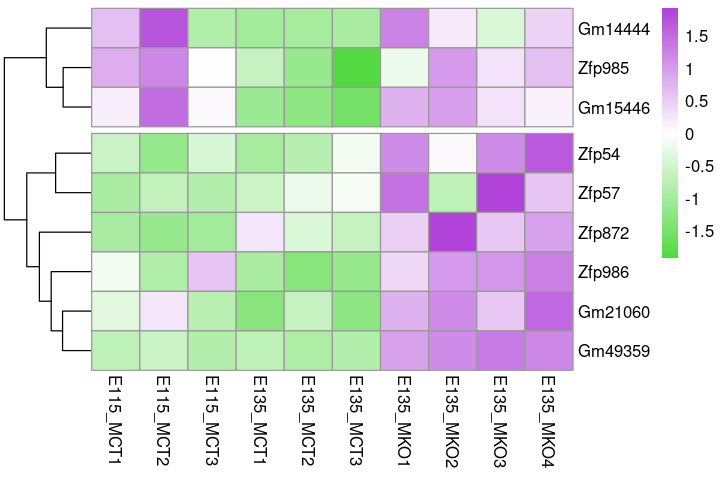

In [137]:
options(repr.plot.height = 4, repr.plot.width = 6)
p_males <- pheatmap(KRAB_All, scale = "row", cluster_rows = T, cluster_cols = F, cutree_rows = 2 ,color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))
#
pdf(file = 'Male_AllTimes_T28KO_Zfp.pdf', height = 4, width = 6)
p_males
dev.off()